In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

1. data loading and processing

1. Load the Dataset

In [ ]:
data = pd.read_csv('/content/onlinefoods.csv')
print(data.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

2. Handle Missing Value

In [ ]:
print(data.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


3. Encode Categorial Variable

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)

In [ ]:
data_dummies['posneg'] = (data['Age']>20).astype(int)

In [ ]:
x = data_dummies.drop(['latitude','longitude','Pin code','Age','posneg',],axis=1)
y = data_dummies['posneg']

2. Exploratory Data Analysis

1. Describe Statistics

In [ ]:
x.describe()

,Family size,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,3.280928,0.572165,0.030928,0.690722,0.023196,0.139175,0.533505,0.177835,0.064433,0.159794,0.481959,0.059278,0.448454,0.030928,0.005155,0.775773,0.817010,0.775773
std,1.351025,0.495404,0.173346,0.462793,0.150720,0.346576,0.499520,0.382868,0.245840,0.366888,0.500320,0.236450,0.497978,0.173346,0.071703,0.417611,0.387157,0.417611
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. Visualization

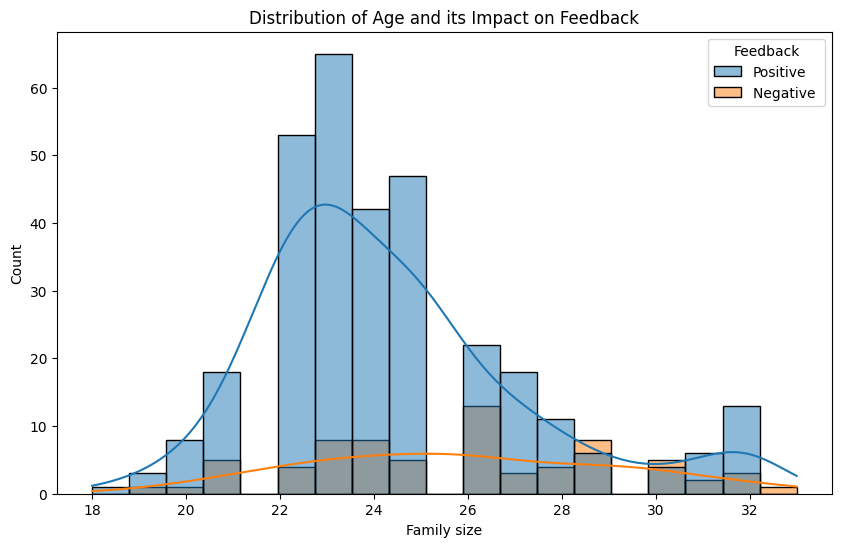

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=data, hue='Feedback', kde=True)
plt.title("Distribution of Age and its Impact on Feedback")
plt.xlabel("Family size")
plt.ylabel("Count")
plt.show()

3. Logistic Regression Model

1. Build the Model

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=70)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

NameError: name 'train_test_split' is not defined

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)

2. Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(f"accuracy: {accuracy}")
print("\nconfusion_matrix: ")
print(conf_matrix)
print("\nreport:")
print(report)

accuracy: 0.9829059829059829

confusion_matrix: 
[[  0   2]
 [  0 115]]

report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99       115

    accuracy                           0.98       117
   macro avg       0.49      0.50      0.50       117
weighted avg       0.97      0.98      0.97       117



4. Data analysis and evaluation

1. Feature importance

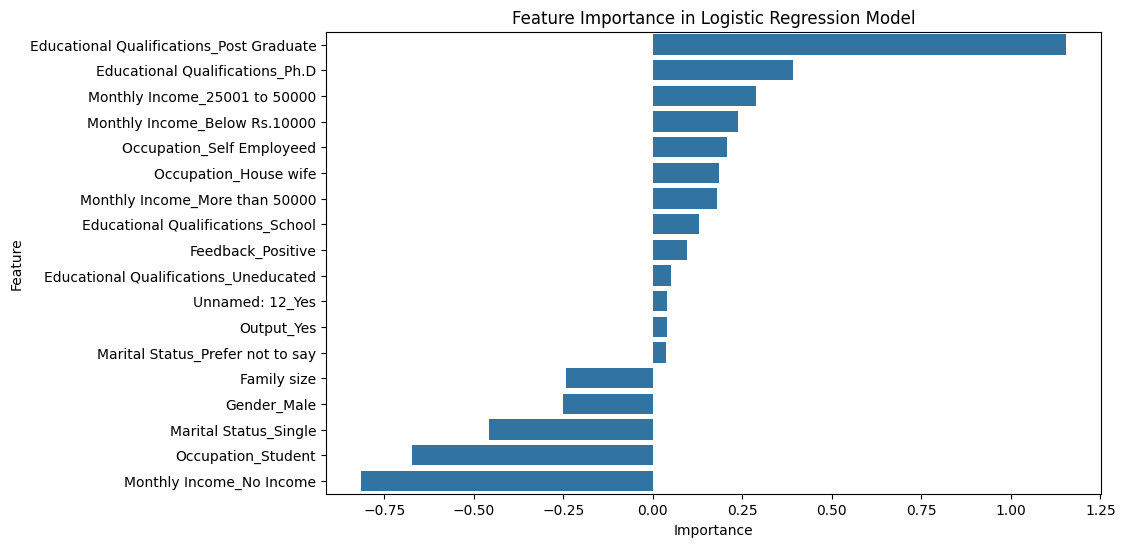

In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance in Logistic Regression Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

The educational qualification is the highest influence to the feedback of the people while the other following feature are less influence because education have a big impact to the feedback of people.

2. Prediction insight

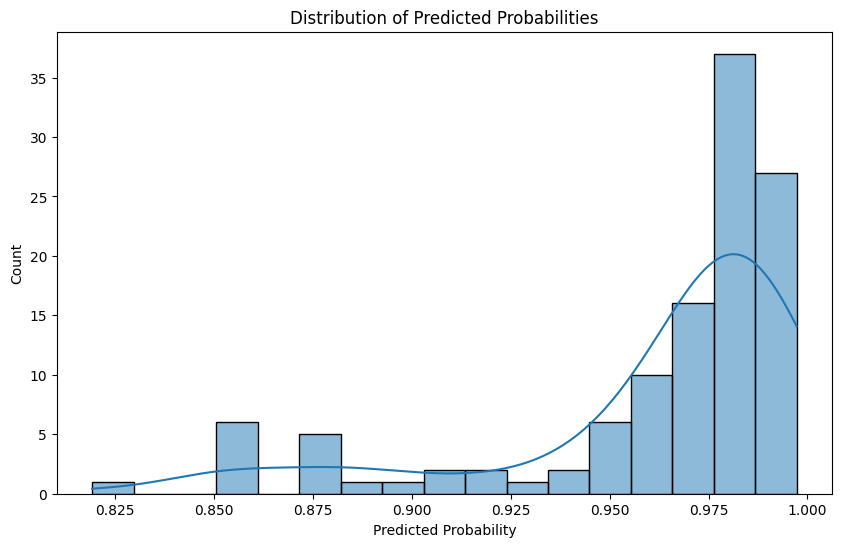

In [ ]:
 y_probs = model.predict_proba(x_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_probs, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()

The older the people and with more education the good the feed back is but as the pattern goes up to almost 20 it gradually goes down again to hit the positive or 1 score.